# Travel Price Prediction

Program ini dirancang untuk membuat sebuah model regresi guna melakukan prediksi 
atau forecasting harga perjalanan platform ride-hailing.
Adapun dataset yang digunakan bersumber dari Kaggle dengan nama Uber and Lyft Dataset Boston,Ma 
yang berisikan tentang informasi semua perjalanan Uber dan Lyft yang dilakukan di Kota Boston

# Import Library

Melakukan import library untuk membantu melakukan prediksi

In [1]:
# Melakukan import library yang akan digunakan

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import phik
from phik import phik_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score


# Data Loading

Tahapan ini untuk melakukan impor data csv yang sudah didownload melalui [Uber and Lyft Dataset Boston, MA](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma) dan dimasukkan ke dalam dataframe menggunakan pandas

In [2]:
# Melakukan import data csv ke dalam dataframe menggunakan pandas serta melakukan pemanggilan dataframe

df_original = pd.read_csv("rideshare_kaggle.csv")

# Duplikasi data ori
df = df_original.copy()

In [3]:
# Melakukan pengecekan informasi atau summary data dari dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Berdasarkan informasi diatas, dataset terdiri 57 kolom dan 693071 baris. Kemudian terdapat 3 informasi tipe data yang terdapat pada kolom dataset, seperti tipe data float sebesar 29 kolom, tipe data integer sebesar 17 kolom, dan tipe data object (string) sebesar 11 kolom.

In [4]:
# Menampilkan ringkasan statistik dari setiap kolom yang berada pada dataset

df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


## Pengecekan informasi unik value dan missing value

In [5]:
# Menampilkan unik value di setiap kolom

df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

Berdasarkan informasi diatas terdapat berbagai macam nilai unik di masing-masing kolom.

In [6]:
# Melakukan pengecekan missing value di setiap kolom dataset

df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Berdasarkan informasi diatas, didapatkan bahwa terdapat missing value pada kolom **price**. Oleh karena itu dibutuhkan sebuah treatment missing value pada kolom **price** agar prediksi yang akan dilakukan memberikan prediksi yang baik atau tidak bias.

In [7]:
# Menghitung total jumlah missing value yang berada di kolom price
missing_values_price = df['price'].isnull().sum()

# Menghitung total jumlah data yang berada di kolom price
total_data_price = len(df['price'])

# Menghitung total persentase missing values pada kolom price dibandingkan dengan total jumlah data yang berada di kolom price
persentase_missing_value_price = (missing_values_price / total_data_price) * 100

print('Total missing value pada price: ', missing_values_price)
print('Total data pada price: ', total_data_price)
print(f"Persentase missing value terhadap total data pada price sebesar: {persentase_missing_value_price: .2f}% ")



Total missing value pada price:  55095
Total data pada price:  693071
Persentase missing value terhadap total data pada price sebesar:  7.95% 


Berdasarkan informasi diatas diketahui bahwa terdapat total missing value pada price sebesar 55095, total data pada price 693071, dan dengan persentase missing value terhadap total data pada kolom price sebesar 7.95 persen.

In [8]:
# Menampilkan dan mengecek data duplikat yang ada di dalam dataset

df.duplicated().sum()

0

Berdasarkan informasi diatas tidak terdapat data duplikat pada setiap data di dataset.

# Exploratory Data Analysis (EDA)

c:\Users\Kelvin Rizky\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


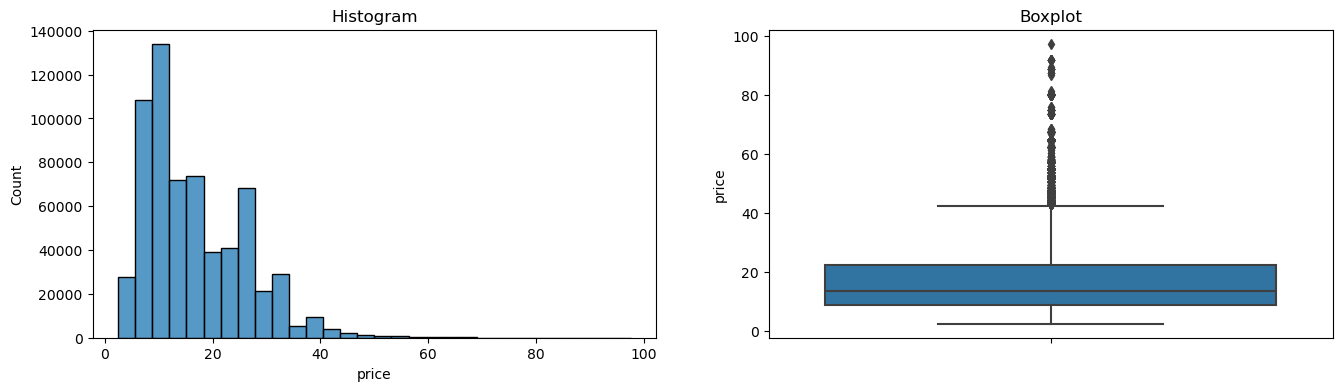

In [9]:
# Membuat fungsi untuk mengecek outlier price dengan menggunakan histogram dan bo

# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=30)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'])
plt.title('Boxplot')

plt.show()

Berdasarkan data diatas dapat diketahi bahwa terdapat outlier, dimana pada histogram terdapat harga yang paling mendominasi di rentang < 20 dollar dan pada boxplot terdapat informasi bahwa data didominasi diluar rentang.

## Layanan transportasi apa yang memiliki harga yang paling mahal?

In [10]:
# Membuat variabel dengan cara mengcopy dataset untuk mengganti missing value dengan median

df_rate = df.copy()

df_rate.shape

(693071, 57)

In [11]:
# Melakukan pengecekan kembali missing value

df_rate.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [12]:
#Mengisi data menggunakan mean
df_rate['price'].fillna(df_rate['price'].mean(), inplace=True)

#Mengecek apakah masih terdapat missing value
df_rate.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Berdasarkan informasi diatas sudah tidak ditemukan lagi missing value karena sudah dilakukan treatment dengan mengganti data ke mean ([Sumber](https://reyvanmaulid.medium.com/data-wrangling-python-38c45c81d428)). Menggunakan mean karena outlier pada **price** tidak terlalu besar.

In [13]:
# Menampilkan rata-rata harga berdasarkan 2 tipe layanan

df_rate.groupby('cab_type')['price'].mean()

cab_type
Lyft    17.351396
Uber    15.902455
Name: price, dtype: float64

<Axes: xlabel='cab_type', ylabel='price'>

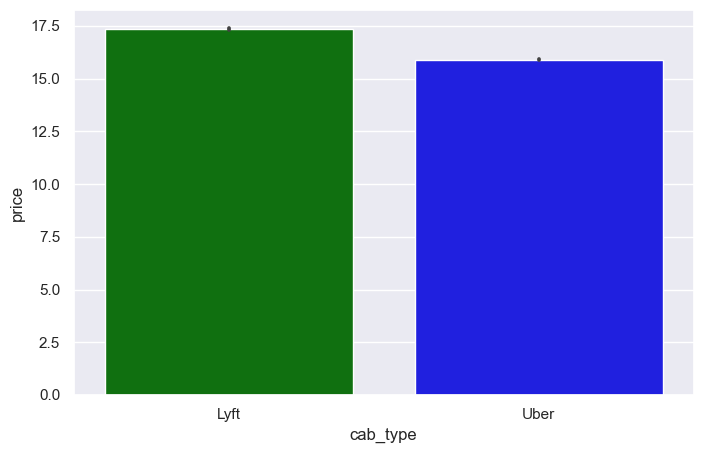

In [14]:
# Membuat barplot

sns.set(rc={'figure.figsize':(8,5)})
cols = ['green', 'blue']
sns.barplot(x='cab_type', y='price', palette= cols, data=df_rate)

Berdasarkan informasi diatas didapatkan bahwa rata-rata harga Lyft cukup mahal dibandingkan dengan Uber, dengan catatan missing value di dalam price di treatment dengan mengganti nilai mean.

## Apakah tarif perjalanan dipengaruhi oleh jenis mobil yang digunakan?

In [15]:
# Menampilkan rata-rata harga berdasarkan jenis mobil pada kolom name
car_type_price = df_rate.groupby('name')['price'].mean()
car_type_price

name
Black           20.523786
Black SUV       30.286763
Lux             17.771240
Lux Black       23.062468
Lux Black XL    32.324086
Lyft             9.610885
Lyft XL         15.309363
Shared           6.029893
Taxi            16.545125
UberPool         8.752500
UberX            9.765074
UberXL          15.678144
WAV              9.765019
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='name'>

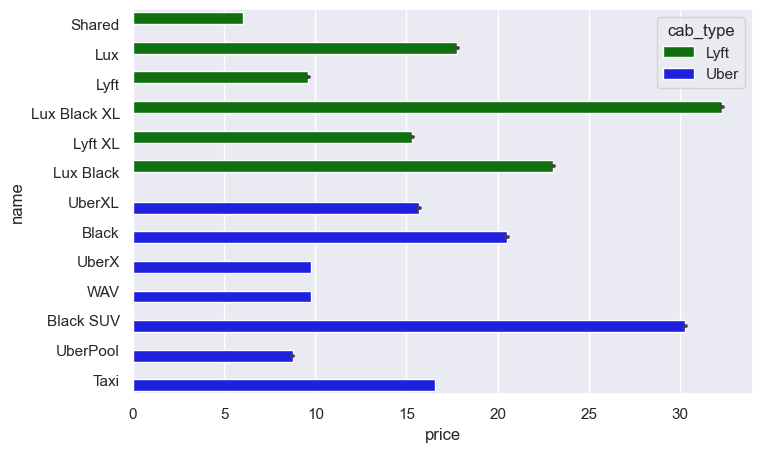

In [16]:
# Menampilkan barplot jenis mobil 
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(y='name', x='price', palette= cols, data=df_rate, hue ='cab_type')

Berdasarkan informasi diatas didapatkan informasi bahwa,

1. Mobil Uber:

Tarif tertinggi --> Black SUV dengan harga 32.32 dollar
Tarif terendah -->  UberPool dengan harga 8.75 dollar

2. Mobil Lyft:

Tarif tertinggi --> Lux Black XL dengan harga 30.28 dollar
Tarif terendah --> Shared dengan harga 6.02 dollar


## Data banyak perjalanan berdasarkan waktu

In [17]:
# Merubah tipe data 'date time' dari object menjadi tipe data datetime
df_rate['datetime']=pd.to_datetime(df_rate['datetime'])

<Axes: xlabel='month', ylabel='count'>

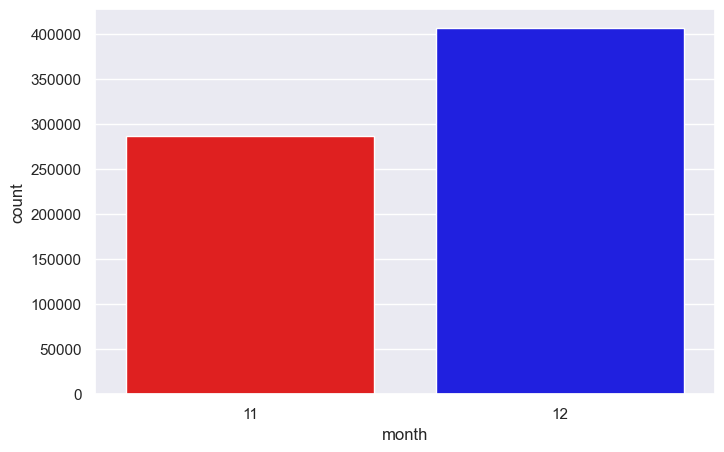

In [18]:
# Menampilkan barplot pada data month
sns.set(rc={'figure.figsize':(8,5)})
cols = cols = ['red', 'blue']
sns.countplot(x='month', palette= cols, data=df_rate)

Berdasarkan hasil visualisasi diatas, didapatkan bahwa data perjalanan hanya terdapat pada bulan November (11) dan Desember (12). Adapun frekuensi perjalanan paling banyak terdapat pada bulan Desember.

<Axes: xlabel='day', ylabel='count'>

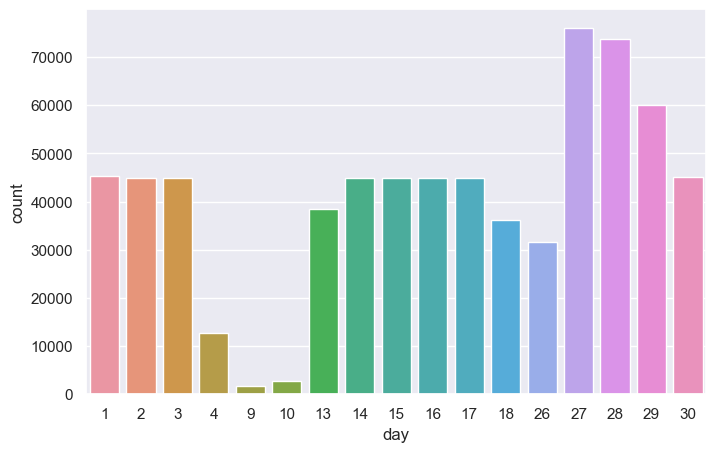

In [19]:
# Menampilkan barplot pada data day
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x='day', data=df_rate)

Berdasarkan hasil visualisasi diatas, didapatkan bahwa frekuensi pemesanan layanan transportasi Uber dan Lyft paling banyak pada tanggal 27 dan paling sedikit pada tanggal 9. Kemudian pada tanggal 5, 6, 7, 8, 11, 12, 19 s.d 25 tidak ada pemesanan layanan transportasi Uber dan Lyft. 

<Axes: xlabel='hour', ylabel='count'>

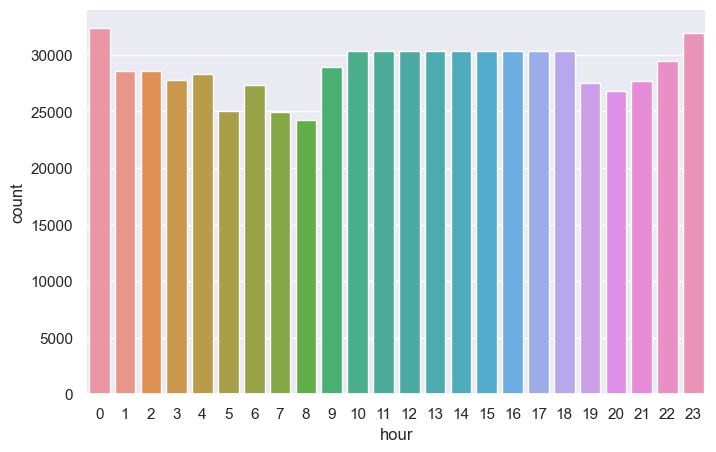

In [20]:
# Menampilkan barplot pada data hour
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x='hour', data=df_rate)

Berdasarkan visualisasi diatas dapat disimpulkan bahwa pada setiap jam terjadi pemesanan layanan transportasi Uber dan Lfyt. 

## Bagaimana Hubungan antara harga dengan jarak

c:\Users\Kelvin Rizky\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kelvin Rizky\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


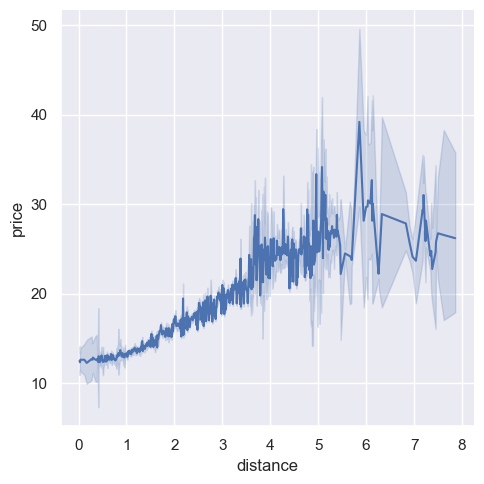

In [21]:
# Menampilkan grafik korelasi price dengan distance
sns.set(rc={'figure.figsize':(8,5)})
sns.relplot(kind='line',
            x='distance',
            y='price',
            data=df_rate,
           )

Berdasarkan visualisasi diatas terdapat korelasi positif antara **jarak** dengan **harga** dimana semakin jauh jarak maka akan meningkatkan harga.

## Berapa banyak pemesanan berdasarkan cuaca

<Axes: xlabel='short_summary', ylabel='count'>

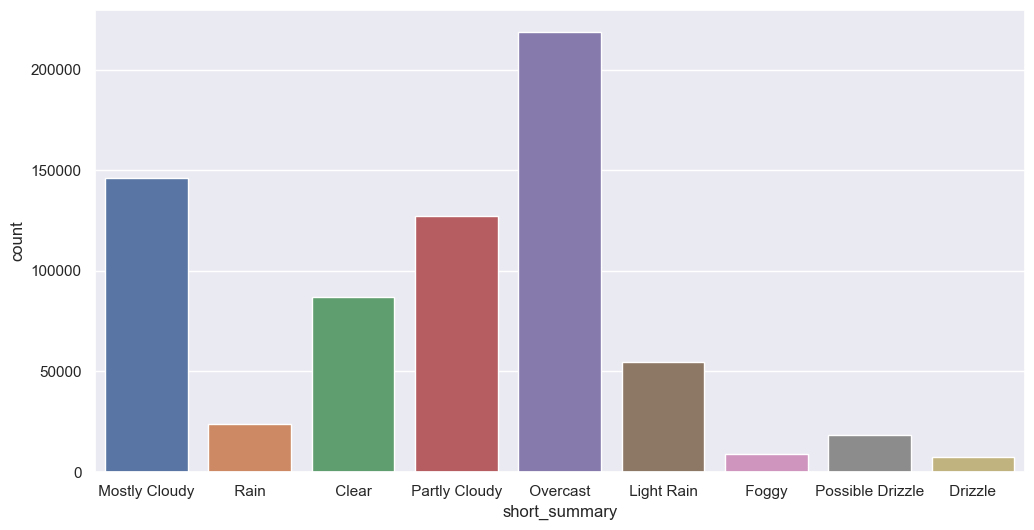

In [22]:
# Menampilkan barplot pada data short_summary
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='short_summary', data=df_rate)

Berdasarkan visualisasi diatas, banyaknya pemesanan layanan transportasi didominasi oleh **Overcast**, diikuti oleh **Mostly Cloud** dan **Partly Cloud** 

# Feature Engineering

## Split Data X dan Y

In [23]:
# Melakukan split data x dan y

X = df.drop(['price'],axis=1)
y = df.price

X.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Membagi data x dan y dengan variabel y sebagai target **price** dan membuang variabel **price** pada variabel x.

In [24]:
# Melakukan split antara data train dan test menggunakan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('X Train Size :', X_train.shape)
print('X Test Size :', X_test.shape)
print('y Train Size :', y_train.shape)
print('y Test Size :', y_test.shape)

X Train Size : (554456, 56)
X Test Size : (138615, 56)
y Train Size : (554456,)
y Test Size : (138615,)


Membagi data test dan train pada variabel X dan y, menjadi X_train, X_test, y_train, y_test, dimana pada data **train** terdapat 554456 baris dan 56 kolom dan pada data **test** terdapat 138615 baris.

## Outlier Handling

In [25]:
# Melakukan pengecekann distribusi dengan menggunakan skewness

print('Distribution of column `distance`  : ', X_train['distance'].skew())

Distribution of column `distance`  :  0.8360620556732666


Karena hasil dari kedua distribusi pada distance dan surge_multiplier lebih dari 0.5, oleh karena itu dapat disimpulkan bahwa terdapat distribusi skewness pada kedua variabel.

In [26]:
# Membuat fungsi untuk mendapatkan nilai batas atas dan batas bawah pada kolom distance
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

Membuat fungsi untuk mendapatkan nilai batas atas dan batas bawah yang nantinya digunakan pada kolom-kolom untuk melakukan treatment pada data outlier.

In [27]:
#Mengindentifikasi outlier distance, dengan distance menggunakan extreme value menggunakan IQR * 1.5

upper_boundary_distance, lower_boundary_distance = find_skewed_boundaries(X_train, 'distance', 1.5)
upper_boundary_distance, lower_boundary_distance


(5.42, -1.2200000000000002)

Pada kolom distance **nilai batas atas**nya adalah 5.445 dan **nilai batas bawah**nya adalah -1.234

In [28]:
# Mengecek distance yang memiliki nilai diatas batas atas

print('Total : {}'.format(len(X_train)))
print('Distance diatas batas atas  : {}'.format(len(X_train[X_train['distance'] > upper_boundary_distance])))
print('')
print('% Distance diatas batas atas  : {}'.format(len(X_train[X_train['distance'] > upper_boundary_distance])/len(X_train) * 100))

Total : 554456
Distance diatas batas atas  : 6183

% Distance diatas batas atas  : 1.1151470991386152


Karena presentase outlier yang kurang dari 5 persen pada kolom distance, oleh karena itu dapat dilakukan trimming pada kolom distance.

In [29]:
# Hitung IQR (Interquartile Range) pada y_train
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

# Hitung Upper Bound dan Lower Bound
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Cetak Upper Bound dan Lower Bound
print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

Upper Bound: 42.75
Lower Bound: -11.25


Pada data **y_train** terdapat nilai batas atas sebesar 42.75 dan nilai batas bawah sebesar -11.25

### Trimming

Menggunakan trimming mengingat presentase outlier terhadap data tidak terlalu besar, oleh karena itu data dapat di drop.

In [30]:
# Membuat variabel outlier pada distance
outliers_distance = np.where(X_train['distance'] > upper_boundary_distance, True,
                       np.where(X_train['distance'] < lower_boundary_distance, True, False))

# Membuat variabel outlier pada y_train
outliers_y_train = np.where(y_train > upper_bound, True,
                            np.where(y_train < lower_bound, True, False))

# Melakukan trimming pada kolom distance.
trim_mask_X_train = ~(outliers_distance)

# Memasukkan hasil trimming X train pada y_train
y_train_trimmed = y_train[trim_mask_X_train]

# Memasukkan hasil trimming X train pada X_train
X_train_trimmed = X_train[trim_mask_X_train]



print('Size dataset X_train - Before trimming : ', X_train.shape)
print('Size dataset X_train - After trimming  : ', X_train_trimmed.shape)

print('Size dataset y_train - Before trimming : ', y_train.shape)
print('Size dataset y_train - After trimming  : ', y_train_trimmed.shape)

Size dataset X_train - Before trimming :  (554456, 56)
Size dataset X_train - After trimming  :  (548273, 56)
Size dataset y_train - Before trimming :  (554456,)
Size dataset y_train - After trimming  :  (548273,)


Melakukan trimming pada X_train, tepatnya pada kolom distance karena terdapat outlier.. Adapun tahapannya adalah mencari outliernya terlebih dahulu dan dan melakukan trimming pada X_train. Kemudian, memasukkan hasil trimming ke dalam X_train dan y_train. Didapatakan bahwa terjadi pengurangan data dari 408256 baris menjadi 404131 baris  dan tetap 3 kolom pada data **X_train** dan 408256 baris menjadi 404131 baris pada data **y_train**.

In [31]:
# Menampilkan distribusi 
print('Distribution of column `distance`  : ', X_train_trimmed['distance'].skew())

Distribution of column `distance`  :  0.4646337956409789


Dalam hal ini mengecek distribusi data pada **distance** dan didapatkan bahwa distribusi datanya menjadi normal.

## Handling Missing Value

In [32]:
# mencari indeks baris yang memiliki nilai null di y_train
index_null_y_train = y_train_trimmed[y_train_trimmed.isnull()].index

# drop baris yang memiliki nilai null di y_train
X_train_cleaned = X_train_trimmed.drop(index_null_y_train)
y_train_cleaned = y_train_trimmed.drop(index_null_y_train)

# mencari indeks baris yang memiliki nilai null di y_test
index_null_y_test = y_test[y_test.isnull()].index

# drop baris yang memiliki nilai null di y_test
X_test_cleaned = X_test.drop(index_null_y_test)
y_test_cleaned = y_test.drop(index_null_y_test)

print('X Train Size :', X_train_cleaned.shape)
print('X Test Size :', X_test_cleaned.shape)
print('y Train Size :', y_train_cleaned.shape)
print('y Test Size :', y_test_cleaned.shape)

X Train Size : (504969, 56)
X Test Size : (127655, 56)
y Train Size : (504969,)
y Test Size : (127655,)


Melakukan handling missing value pada data train dan test dengan cara membuang data tersebut. Adapun tahapannya adalah mencari index dimana terdapat missing value dan melakukan drop missing value berdasarkan index. Didapatakan terdapat 510321 baris dan 56 kolom pada data **train** dan 127655 baris pada data **test**.

## Feature Selection

In [33]:
#Menggabungkan data x-train dan y-train 
train_set = pd.concat([X_train_cleaned, y_train_cleaned], axis = 1)
test_set = pd.concat([X_test_cleaned, y_test_cleaned], axis = 1)

Menggabungkan data **train** dan **test** yang sudah dilakukan handling missing value dengan menggunakan concat. Adapun tujuannya adalah ingin mencari korelasi antara **price** dengan seluruh kolom pada dataset.

In [34]:
#Mengubah tipe data menjadi tipe data categorical jika nominal atau ordinal dan tipe data interval jika numerik
train_set_types = {

    "id":"categorical", 
    "timestamp":"interval",
    "hour":"interval",  
    "day":"interval",  
    "month":"interval",  
    "datetime":"categorical", 
    "timezone":"categorical", 
    "source":"categorical", 
    "destination":"categorical", 
    "cab_type":"categorical", 
    "product_id":"categorical", 
    "name":"categorical", 
    "price":"interval",
    "distance":"interval",
    "surge_multiplier":"interval",
    "latitude":"interval",
    "longitude":"interval",
    "temperature":"interval",
    "apparentTemperature":"interval",
    "short_summary":"categorical", 
    "long_summary":"categorical", 
    "precipIntensity":"interval",
    "precipProbability":"interval",
    "humidity":"interval",
    "windSpeed":"interval",
    "windGust":"interval",
    "windGustTime":"interval", 
    "visibility":"interval",
    "temperatureHigh":"interval",
    "temperatureHighTime":"interval",  
    "temperatureLow":"interval",
    "temperatureLowTime":"interval", 
    "apparentTemperatureHigh":"interval",
    "apparentTemperatureHighTime":"interval",  
    "apparentTemperatureLow":"interval",
    "apparentTemperatureLowTime":"interval",  
    "icon":"categorical", 
    "dewPoint":"interval",
    "pressure":"interval",
    "windBearing":"interval",  
    "cloudCover":"interval",
    "uvIndex":"interval",  
    "visibility.1":"interval",
    "ozone":"interval",
    "sunriseTime":"interval",  
    "sunsetTime":"interval",  
    "moonPhase":"interval",
    "precipIntensityMax":"interval",
    "uvIndexTime":"interval",  
    "temperatureMin":"interval",
    "temperatureMinTime":"interval",  
    "temperatureMax":"interval",
    "temperatureMaxTime":"interval",  
    "apparentTemperatureMin":"interval",
    "apparentTemperatureMinTime":"interval",  
    "apparentTemperatureMax":"interval",
    "apparentTemperatureMaxTime":"interval"  
}

interval_cols = [col for col, v in train_set_types.items() if v=='interval' and col in train_set.columns]
interval_cols


['timestamp',
 'hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

Mengubah data **numerik** menjadi data **interval** dan mengubah data **string** atau **object** menjadi **categorical** untuk membuat korelasi menggunakan phik matriks.

In [35]:
# Menampilkan korelasi antar kolom prediktor dengan target (y)

df.drop(["id", "timestamp", "datetime"], axis = 1).phik_matrix(interval_cols = interval_cols)["price"]

c:\Users\Kelvin Rizky\miniconda3\lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable timezone for analysis 1. Dropping this column
  warnings.warn(


hour                           0.000000
day                            0.000000
month                          0.004074
source                         0.165383
destination                    0.154053
cab_type                       0.146287
product_id                     0.677581
name                           0.677581
price                          1.000000
distance                       0.435798
surge_multiplier               0.356672
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.001424
precipIntensity                0.000000
precipProbability              0.004060
humidity                       0.000000
windSpeed                      0.000000
windGust                       0.002653
windGustTime                   0.000000
visibility                     0.001513
temperatureHigh                0.000000


Berdasarkan hasil korelasi phix matrix dapat disimpulkan bahwa variabel independen yang akan digunakan untuk memprediksi prekdiktor **price** adalah **name, distance, surge_multiplier**, karena ketiga variabel tersebut memiliki korelasi yang cukup tinggi dibandingkan dengan korelasi kolom lainnya. 

In [36]:
# Mengambil fitur-fitur yang memiliki korelasi dengan prediktor, dimana fitur tersebut dimasukkan ke dalam variabel X train, dan price pada variabel y.
X = train_set[['name', 'distance', 'surge_multiplier']]
y = train_set['price']

Dalam hal ini mengambil kolom-kolom yang memiliki korelasi yang kuat dengan **price**. Kemudian kolom-kolom tersebut dimasukkan ke dalam variabel X pada data train_set dan memasukkan price ke dalam variabel y pada data train_set.

In [37]:
# Split variabel X dan y menjadi 2 bagian, yaitu train dan test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('X Train Size :', X_train.shape)
print('X Test Size :', X_test.shape)
print('y Train Size :', y_train.shape)
print('y Test Size :', y_test.shape)

X Train Size : (403975, 3)
X Test Size : (100994, 3)
y Train Size : (403975,)
y Test Size : (100994,)


Setelah mengambil kolom-kolom yang sudah dipilih, kemudian melakukan split lagi pada data train dan test. Adapun setelah dilakukan split data train set didapatakan bahwa pada data **train** terdapat 408256 baris dan 3 kolom dan pada data **test** terdapat 408256 baris.

## Split Numerical dan Categorical Columns

In [38]:
# Membagi kolom kategori dan numerik pada variabel X
num_col = X_train.select_dtypes(include=np.number).columns.tolist()
cat_col = X_test.select_dtypes(include=['object']).columns.tolist()

print('Numerical column:',num_col)
print('Categorical column:',cat_col)

Numerical column: ['distance', 'surge_multiplier']
Categorical column: ['name']


Membuat data **numerik** dan data **kategorikal** berdasarkan tipe data kolomnya. Kemudian memasukkan data numerik pada data **X_train** dan memasukkan data kategori pada data **X_test**

In [39]:
# Split variabel train dan test berbasis tipe kolom
X_train_num = X_train[num_col]
X_test_num = X_test[num_col]

X_train_cat = X_train[cat_col]
X_test_cat = X_test[cat_col]

X_train_num.head()

,distance,surge_multiplier
81068,0.68,1.0
328075,2.30,1.0
108386,2.70,1.0
458037,1.71,1.0
230894,3.24,1.0


Membagi data **train** dan **test** berdasarkan **numerik** dan **kategori** pada data X_train dan X_test.

In [40]:
#Menampilkan informasi pada kolom X_train_cat
X_train_cat.info

<bound method DataFrame.info of                 name
81068           Lyft
328075          Lyft
108386        Shared
458037     Lux Black
230894  Lux Black XL
...              ...
14235          UberX
104160       Lyft XL
133864           Lux
264758      UberPool
567822     Black SUV

[403975 rows x 1 columns]>

In [41]:
#Menampilkan informasi pada kolom X_train_cat
X_train_num.info

<bound method DataFrame.info of         distance  surge_multiplier
81068       0.68               1.0
328075      2.30               1.0
108386      2.70               1.0
458037      1.71               1.0
230894      3.24               1.0
...          ...               ...
14235       1.18               1.0
104160      2.70               1.0
133864      2.86               1.0
264758      1.00               1.0
567822      1.16               1.0

[403975 rows x 2 columns]>

## Feature Scaling

In [42]:
# Melakukan scaling menggunakan MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train[['distance', 'surge_multiplier']]) 

X_train_num_scaled = scaler.transform(X_train[['distance', 'surge_multiplier']])
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.12222222, 0.        ],
       [0.42222222, 0.        ],
       [0.4962963 , 0.        ],
       ...,
       [0.52592593, 0.        ],
       [0.18148148, 0.        ],
       [0.21111111, 0.        ]])

Melakukan scaling pada data numerik mengunakan **MinMaxScaler** dan memasukkan hasil scaling pada data X_train. Kemudian juga melakukan scaling pada X_test_num

## Feature Encoding

In [43]:
# Menampilkan kolom pada X_train
X_train.columns

Index(['name', 'distance', 'surge_multiplier'], dtype='object')

In [44]:
# Menampilkan nilai unik pada name
X_train.name.unique()

array(['Lyft', 'Shared', 'Lux Black', 'Lux Black XL', 'Lyft XL', 'Lux',
       'Black', 'UberXL', 'Black SUV', 'UberPool', 'UberX', 'WAV'],
      dtype=object)

In [45]:
#Melakukan encoding menggunakan OneHotEncoder 
y = OneHotEncoder(sparse_output=False)
X_train_cat_encoded = y.fit_transform(X_train[['name']])
X_test_cat_encoded = y.transform(X_test[['name']])

X_train_cat_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

Dalam hal ini melakukan encoding pada kolom name menggunakan **OneHotEncoder** karena nilai pada kolom name adalah **nominal**.

### Menggabungkan data X train dan test

In [46]:
# Menggabungkan data numerik dan kategori dan dimasukkan ke dalam variabel X_train_final dan X_test_final
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final

array([[0.12222222, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.42222222, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4962963 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.52592593, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18148148, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21111111, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Dalam hal ini menggabungkan seluruh proses feature scaling dan feature encoding dan dimasukkan ke dalam **X_train** dan **X_test**

# Model Definition

Dalam hal ini model yang digunakan adalah model Linear Regression. Hal tersebut dikarenakan karena model yang diprediksi adalah variabel yang bertipe data numerik, yang mana sangat baik untuk memprediksi nilai yang bertipe data numerik atau bilangan. Adapun metode yang digunakan adalah Regresi Linear Berganda atau Multiple Linear Regression karena menggunakan variabel independen lebih dari 1 untuk memprediksi variabel independen.

Kemudian, model Linear Regression memiliki kelebihan seperti dapat memberikan representasi sederhana terhadap pola hubungan antara variabel dan dapat memberikan nilai dan arah pengaruh variabel indepeden terhadap variabel dependen. 

Dari sisi kelemahan, model Linear Regression harus memenuhi 5 uji asumsi klasik seperti uji Normalitas untuk mengecek nilai residu normal atau tidak, uji Multikolinearitas untuk mengecek korelasi antar variabel independen, uji Heterokedastisitas untuk memeriksa apakah terdapat perbedaan yang tidak sama antara residu satu dengan variabel independen lainnya, uji autokorelasi untuk melihat apakah terjadi korelasi di antara suatu periode dengan periode-periode sebelumnya, dan uji linearitas untuk melihat apakah model yang telah dibangun memiliki hubungan linear atau tidak [Uji Asumsi Klasik pada Statistik Regresi](https://dqlab.id/kenali-uji-asumsi-klasik-pada-metode-statistik-regresi). Jika salah satu asumsi tidak dipenuhi, maka model regresi yang dibentuk atau dibangun akan memberikan prediksi yang bias atau tidak akurat.    

Kemudian metrik yang digunakan dalam model adalah metrik Mean Absolute Error (MAE), Mean Square Error (MSE), Root Mean Square Error (RMSE),dan R-squared, ([Referensi MAE, MSE, dan RMSE](https://www.trivusi.web.id/2023/03/perbedaan-mae-mse-rmse-dan-mape.html) serta [Referensi R-squared](https://accounting.binus.ac.id/2021/08/12/memahami-r-square-koefisien-determinasi-dalam-penelitian-ilmiah/))   

MAE digunakan menghitung rata-rata dari selisih absolut antara nilai prediksi dan nilai aktual. Semakin kecil nilai MAE yang diberikan maka model regresi yang dibentuk cukup baik. 

MSE digunakan untuk menghitung berapa rata-rata kesalahan kuadrat dalam prediksi. Semakin kecil nilai MSE yang diberikan maka model regresi yang dibentuk cukup baik.

RMSE digunakan untuk menghitung rata-rata dari selisih kuadrat antara nilai prediksi dan nilai aktual kemudian diambil akar kuadratnya. Semakin kecil nilai RMSE yang diberikan maka model regresi yang dibentuk cukup baik.

Penggunaan R-squared digunakan untuk melihat persentase variabel independen dapat menjelaskan variabel dependen di dalam model atau nilai yang memperlihatkan seberapa besar variabel independen mempengaruhi variabel dependen.

# Modeling training

In [47]:
# Model linear
model_lin = LinearRegression()

# Melakukan training pada variabel X terhadap y 
model_lin.fit(X_train_final, y_train)

LinearRegression()

Menggunakan model linear regression untuk melakukan prediksi **price** dengan menggunakan variabel **distance, surge_multiplier, dan name** 

# Model Evaluation

In [48]:
# Melakukan prediksi pada data train dan data test

y_pred_train = model_lin.predict(X_train_final)
y_pred_test = model_lin.predict(X_test_final)

print(y_pred_train)
print(y_pred_test)

[ 4.61819975  9.24512619  7.50199442 ... 19.01045327  5.47419459
 27.25056976]
[14.9118402   7.06167985 11.72010407 ... 15.41351803  9.10147642
 30.73504522]


Melakukan prediksi pada data train dan test pada variabel y menggunakan variabel X. Adapun hasilnya berbentuk array.

In [49]:
# Menampilkan coef dan intercept
coefficients = model_lin.coef_
intercept = model_lin.intercept_


print('Intercept : ', intercept)
print('Coefficient : ', coefficients)

Intercept :  118308930.91964807
Coefficient :  [ 1.54230881e+01  3.63149088e+01 -1.18308917e+08 -1.18308907e+08
 -1.18308920e+08 -1.18308915e+08 -1.18308905e+08 -1.18308928e+08
 -1.18308922e+08 -1.18308931e+08 -1.18308928e+08 -1.18308927e+08
 -1.18308921e+08 -1.18308927e+08]


Berdasarkan data diatas terdapat nilai intercept dan 14 nilai coefficient.

Oleh karena itu dapat dituliskan model ekonometrikanya sebagai berikut:

``y = B0 + B1X1 + B2X2 + B3X3``

``price = B0 + B1 distance + B2 surge_multiplier + B3 name``

Pengaruh **distance** terhadap **price** adalah postive, yang dilihat dari coefficient sebesar 1.54903023e+01. Artinya ketika distance atau jarak perjalanan meningkat, maka akan meningkatkan harga. 

Pengaruh **surge_multiplier** terhadap **price** adalah postive, yang dilihat dari coefficient sebesar 3.61469135e+01. Artinya ketika surge_multiplier meningkat, maka akan meningkatkan harga. 

Pengaruh **name** terhadap setiap kategori **price** adalah negative, yang salah satunya dapat dilihat dari coefficient sebesar -5.86199365e+09. Artinya ketika menggunakan salah satu jasa pada Uber atau Lyft dengan model mobil tertentu, maka akan menurunkan harga.

Pada **intercept**, jika tidak ada variabel independen yang dimasukkan ke dalam model regresi, maka **price** bernilai 5861993659.429637

In [50]:
# Melakukan tampilan pada y_train_trimmed
y_train

81068      7.0
328075     9.0
108386     7.0
458037    22.5
230894    38.5
          ... 
14235      8.5
104160    16.5
133864    19.5
264758     8.0
567822    26.5
Name: price, Length: 403975, dtype: float64

In [51]:
# Melakukan tampilan pada y_test_cleaned
y_test

25298     15.5
683156     7.0
511024    10.5
668295    25.5
136316     5.0
          ... 
446697     8.0
251204    13.5
104349    13.0
119756     9.0
166289    31.0
Name: price, Length: 100994, dtype: float64

In [52]:
# Model Evaluation using MAE
print('Error - Train set MAE:',mean_absolute_error(y_train,y_pred_train))
print('Error - Test set MAE:',mean_absolute_error(y_test,y_pred_test))
print('')

# Model Evaluation using MSE
print('Error - Train set MSE:',mean_squared_error(y_train,y_pred_train))
print('Error - Test set MSE:',mean_squared_error(y_test,y_pred_test))
print('')

# Model Evaluation using RMSE
print('Error - Train set RMSE:',root_mean_squared_error(y_train,y_pred_train))
print('Error - Test set RMSE:',root_mean_squared_error(y_test,y_pred_test))
print('')

# Model Evaluation using R2_score
print('Error - Train set R2_score:',r2_score(y_train,y_pred_train))
print('Error - Test set R2_score:',r2_score(y_test,y_pred_test))
print('')

Error - Train set MAE: 1.740514653341507
Error - Test set MAE: 1.7473763617364633

Error - Train set MSE: 5.959000419730892
Error - Test set MSE: 6.075433790493006

Error - Train set RMSE: 2.4411063925463985
Error - Test set RMSE: 2.4648395060313777

Error - Train set R2_score: 0.9299696097618643
Error - Test set R2_score: 0.9288887381846581



Berdasarkan **MAE** pada train dan test terdapat nilai masing-masing sebesar 1.74 dan 1.78. Artinya, pada data train rata-rata erorr pada prediksi y sebesar 1.74 adapun data test rata-rata erorr pada prediksi y sebesar 1.78.

Berdasarkan **MSE** pada train dan test terdapat nilai masing-masing sebesar 5.95 dan 6.07. Artinya, pada data train  rata-rata kuadrat selisih antara nilai prediksi dan nilai sebenarnya sebesar 5.95 adapun data test  rata-rata kuadrat selisih antara nilai prediksi dan nilai sebenarnya sebesar 6.07.

Berdasarkan **RMSE** pada train dan test terdapat nilai masing-masing sebesar 2.44 dan 2.46. Artinya, pada data train akar kuadrat dari MSE sebesar 2.44 adapun data test akar kuadrat dari MSE sebesar 2.46.

Kemudian, berdasarkan **R-squared** pada train dan test terdapat nilai masing-masing sebesar 0.929 dan 0.925. Artinya, pada data train variabel X dapat menjelasakan variabel y sebesar 92,9 % dan pada data test variabel X dapat menjelasakan variabel y sebesar 92,5 %. Jika dilihat dari perbedaan nilai R2 Train dan R2 Test yang tidak mencapai 5 persen, artinya model yang diberikan sudah goodfit.


Dari hasil tersebut, dapat disimpulkan bahwa model memiliki kinerja yang baik, karena:

1. Nilai MAE, MSE, dan RMSE relatif rendah, menunjukkan bahwa kesalahan prediksi model tidak terlalu besar.

2. Nilai R2 yang tinggi menunjukkan bahwa sebagian besar variasi dalam harga (variabel dependen) dapat dijelaskan oleh variabel independen (name, surge_multiplier, dan distance). Perbedaan yang kecil antara R2 pada data pelatihan dan uji menunjukkan bahwa model memiliki kemampuan yang baik dalam menggeneralisasi dari data pelatihan ke data uji (tidak ada tanda-tanda overfitting atau underfitting yang signifikan).

Dengan demikian, berdasarkan metrik evaluasi yang diberikan, model regresi yang dibangun tampaknya cukup baik dalam memprediksi harga (variabel dependen) berdasarkan variabel independen yang telah dijelaskan (name, surge_multiplier, dan distance).

# Model Inference

In [53]:
# Mengambil sample inference dari dataframe

df_inference = df.sample(1, random_state=20)

Membuat data inference dari sampe dataframe. 

In [54]:
# Melakukan split data numerik dan data kategorial

data_inf_numerik = df_inference[num_col]
data_inf_kategori = df_inference[cat_col]
data_inf_kategori

,name
668305,Shared


Melakukan split data numerik dan kategori dari data inference yang dibuat.

In [55]:
# Melakukan scaling dan encoding pada kolom numerik dan kategori

df_inf_scaled = scaler.transform(data_inf_numerik[['distance', 'surge_multiplier']])
df_inf_encoded = y.transform(data_inf_kategori[['name']])

df_inference_final = np.column_stack((df_inf_scaled, df_inf_encoded))

df_inference_final

array([[0.56111111, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        ]])

Melakukan scaling pada data numerik dan encoding pada data kategorik dan kmeudian menggabungkan scaling dan encoding utk dilakukan prediksi sbeagai variabel independen.

In [56]:
# Melakukan prediksi
y_pred_inference = model_lin.predict(df_inference_final)

print(f"Hasil prediksi harga : {y_pred_inference}")

df_inference[['name', 'distance', 'surge_multiplier', 'price']]

Hasil prediksi harga : [8.50163901]


,name,distance,surge_multiplier,price
668305,Shared,3.05,1.0,7.0


Dalam hal ini prediksi pada data inference berhasil dilakukan dan kemudian dilakukan komparasi antara price prediksi dan price original.

# Overall Analysis

Berdasarkan analisis hasil koefisien dan intercept dalam model regresi yang telah disediakan, dapat disimpulkan dalam bentuk informasi bahwa:

**1. Pengaruh Distance terhadap Price**:

Koefisien positif (1.54903023e+01) pada variabel distance menunjukkan bahwa terdapat hubungan positif antara jarak perjalanan (distance) dengan harga (price).
Dengan kata lain, semakin jauh perjalanan, semakin tinggi harga yang dikenakan.

**2. Pengaruh Surge Multiplier terhadap Price**:

Koefisien positif (3.61469135e+01) pada variabel surge_multiplier menunjukkan bahwa terdapat hubungan positif antara faktor peningkatan (surge multiplier) dengan harga (price).
Artinya, ketika terjadi peningkatan dalam surge_multiplier, harga juga cenderung meningkat.

**3. Pengaruh Name terhadap Price**:

Koefisien negatif pada variabel name terhadap harga menunjukkan bahwa terdapat hubungan negatif antara menggunakan jasa Uber atau Lyft dengan model mobil tertentu dan harga.
Artinya, menggunakan salah satu layanan dengan model mobil tertentu dapat menurunkan harga.

**4. Intercept**:

Intercept atau nilai konstanta pada 5861993659.429637 adalah nilai harga yang diestimasi ketika tidak ada variabel independen yang dimasukkan ke dalam model.




Berdasarkan analisis regresi linear diatas juga dapat disimpulkan **kelebihan dan kekurangan** model pada regresi.

Kelebihan pada model regresi linear diatas adalah dapat memberikan representasi sederhana terhadap pola hubungan antara variabel dan dapat memberikan nilai dan arah pengaruh variabel indepeden seperti **name, surge_multiplier, dan distance** terhadap variabel dependen **price** sebagai contoh adanya hubungan seatah atau positif antara **distance** dan **surge_multiplier** dengan **price**, artinya semakin meningkatnya **distance maupun surge_multiplier** maka akan meningkatkan **harga**.

Kemudian dari sisi kelemahan, output dari model regresi linear adalah nilai estimasi yang mana terdapat kemungkinan adanya ketidaksesuaian dengan data aktual yang ada dan harus memenuhui 5 uji asumsi klasik. Selain itu, pemilihan variabel independen dan variabel dependen yang saling berkaitan dalam hal sebab-akibat juga terbilang cukup sulit. Hal tersebut karena model yang akan dibangun atau dibentuk bisa jadi tidak baik disebabkan karena kesalahan dalam memilih variabel yang digunakan untuk analisis. Lebih lanjut, regresi linear juga hanya dapat berfungsi jika relasi antar datanya adalah linear. Pada realita di lapangan, relasi antar data didominasi oleh relasi tidak linear, oleh karena itu regresi linear tidak dapat memberikan gambaran garis terbaik. 

Oleh karena itu futher improvement dalam analisis ini dapat menggunakan model regresi lainnya seperti polynomial linear regresion karena dapat pada polynomial linear regresion dapat memprediksi variabel dependen yang terdapat relasi antar data tidak linear. 